In [48]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

Simulated values
20.02 20.02
94.77880000000003 94.77880000000005
Theoretical values
19.999999999999996
96.0


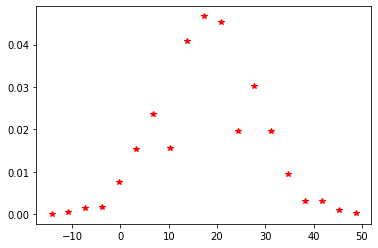

In [49]:
## a)
a = 1
q = 0.6 #0.5  # probabilidade de a
M = 100 #n de realizações

nmax = 10000

Xn=np.zeros(nmax);    #posição inicial da particula

for nx in range(nmax):
    S = np.zeros(M)
    for mx in range(M):
        if np.random.rand(1) <= q :
            S[mx]=a
        else:
            S[mx]=-a

    Xn[nx]=np.sum(S)

x_max = np.max(Xn)
x_min = np.min(Xn)
nbins = 20
dx = (x_max - x_min)/nbins

values, bins = np.histogram(Xn, bins=np.arange(x_min + dx/2, x_max + dx/2, dx))
values = values / np.sum(values)/ dx

plt.plot(bins[:-1], values, '*r')

X_mean = 0
X_mean2 = 0
for i in range(nmax):
    X_mean += Xn[i]
    X_mean2 += Xn[i]**2

X_mean /= nmax
X_mean2 /= nmax
    
mu, std = norm.fit(Xn)

print("Simulated values")
print(mu, X_mean)
print(std**2, -X_mean**2+X_mean2)

print("Theoretical values")
print((2 * q - 1) * a * M)
print(4 * q * (1 - q) * a**2 * M)


<ipython-input-50-c1c69a80149f>:39: RuntimeWarning: divide by zero encountered in double_scalars
  pteorico=1/np.sqrt(2*np.pi*VarX)*np.exp(-(xx-Xmt)**2/(2*VarX)) #esperado para n grande
<ipython-input-50-c1c69a80149f>:39: RuntimeWarning: divide by zero encountered in true_divide
  pteorico=1/np.sqrt(2*np.pi*VarX)*np.exp(-(xx-Xmt)**2/(2*VarX)) #esperado para n grande
<ipython-input-50-c1c69a80149f>:39: RuntimeWarning: invalid value encountered in multiply
  pteorico=1/np.sqrt(2*np.pi*VarX)*np.exp(-(xx-Xmt)**2/(2*VarX)) #esperado para n grande


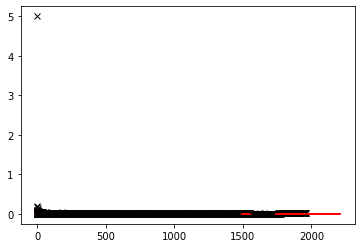

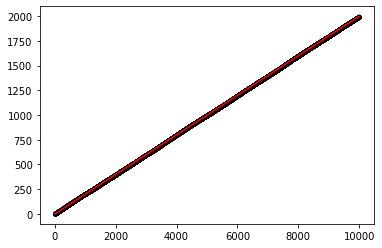

In [50]:
## c)
nbins = 10
xmed=np.zeros(nmax)

Xn=np.zeros(M);             # posição inicial de todas as realizações

for n in range(nmax):       # todos os passos
    for ir in range(M):     # todas as realizações
        u=np.random.rand()
        if u <= q:
            S=a
        else:
            S=-a

        Xn[ir]=Xn[ir]+S;    # nova posicao da realizao ir da trajetoria

    xmed[n]=np.sum(Xn)/M;       # a media da posicao sobre todas as realizacoes no instante n

    # fazer o histograma de 10 em 10 passos

    if (n % 10 == 0):

        xmax=np.max(Xn)
        xmin=np.min(Xn)

        h,bins=np.histogram(Xn,bins=np.linspace(0, xmax, nbins))

        
        dx=(xmax-xmin)/nbins

        hn=h/np.sum(h)/dx

        VarX=4*q*(1-q)*a*a*n;   # Variancia --> enunciado

        Xmt=(2*q-1)*a*n;        # valor médio --> enunciado

        xx=np.linspace(xmin,xmax,200)

        pteorico=1/np.sqrt(2*np.pi*VarX)*np.exp(-(xx-Xmt)**2/(2*VarX)) #esperado para n grande

        plt.figure(2)

        plt.plot(bins[:-1],hn,'kx')
        plt.plot(xx,pteorico,'r-')

        hmax=np.max(hn)
        



plt.figure(3)

n=np.arange(0,nmax,1)

Xmt=(2*q-1)*a*n

plt.plot(n,xmed,'k.')
plt.plot(n,Xmt,'r-')



